# 5.1 Learning Algorithms

$\textbf{5.1.4}$ Example: Linear Regression

Learner: $$\pmb{y} = \beta \pmb{1_m} + w_1 \pmb{x_1} + ... w_n \pmb{x_n}$$
where $\beta$ (bias) and $w_i$ are scalar parameters (to fit), and $\pmb{y, x_i} \in \mathbb{R}^{m \times 1}$ for $i$ = 1,2,..,$n$ are the target and feature columns, respectively, of the given data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = load_boston()
boston.data[:4]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00]])

In [3]:
boston.target[:4]

array([24. , 21.6, 34.7, 33.4])

In [4]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [5]:
# we create an instance of a Linear Regressor
linreg = linear_model.LinearRegression(fit_intercept=True, normalize=True)

In [6]:
#fit the model using the training data
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [7]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
print("normalized L-2 distance between prediction and target")
print("(Mean Squared) Train Error: ", mean_squared_error(y_train, y_train_pred))
print("(Mean Squared) Test Error: ", mean_squared_error(y_test, y_test_pred), " (estimated Generalization Error)")

normalized L-2 distance between prediction and target
(Mean Squared) Train Error:  21.89631767714173
(Mean Squared) Test Error:  23.54496609995834  (estimated Generalization Error)


# 5.2 Capacity, Overfitting, and Underfitting

Increased Capacity (e.g. quadratic features): $$\pmb{y} = \beta \pmb{1_m} + w_1 \pmb{x_1} + ... w_n \pmb{x_n} + \sum_{i}^{n} \sum_{j}^{n} w_{in + j} \pmb{x_i x_j}$$

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
n = 2
poly2 = PolynomialFeatures(n,include_bias=False)

In [10]:
poly2_X_train = poly2.fit_transform(X_train)
poly2_X_test = poly2.fit_transform(X_test)

In [11]:
linreg.fit(poly2_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
y_train_pred = linreg.predict(poly2_X_train)
y_test_pred = linreg.predict(poly2_X_test)
print("L-2 distance between prediction and target")
print("Train Error: ", mean_squared_error(y_train, y_train_pred))
print("Test Error: ", mean_squared_error(y_test, y_test_pred), " (estimated Generalization Error)")

L-2 distance between prediction and target
Train Error:  5.102553706349915
Test Error:  20.196509156944856  (estimated Generalization Error)


In [13]:
poly_n_err = np.empty(shape=(0,3))

poly_order = 5
for i in range(1,poly_order):
    poly = PolynomialFeatures(i,include_bias=False)

    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)

    linreg.fit(poly_X_train, y_train)
    
    y_train_pred = linreg.predict(poly_X_train)
    y_test_pred = linreg.predict(poly_X_test)

    train_err = mean_squared_error(y_train, y_train_pred)
    test_err = mean_squared_error(y_test, y_test_pred)
    score = r2_score(y_test, y_test_pred)

    poly_n_err = np.append(poly_n_err, np.array([[train_err, test_err, score]]), axis=0)

[[2.18963177e+01 2.35449661e+01]
 [5.10255371e+00 2.01965092e+01]
 [4.27544371e-23 2.12730532e+04]
 [5.30410736e-24 1.62743091e+04]]


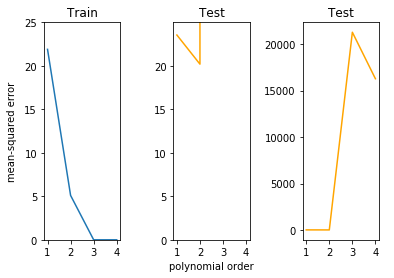

In [30]:
print(poly_n_err[:, :2])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.subplots_adjust(wspace=0.7)

ax1 = fig.add_subplot(131)
ax1.plot(range(1,poly_order), poly_n_err[:,0])
plt.xticks(range(1,poly_order))
plt.title('Train')
plt.ylim([0, 25])

ax2 = fig.add_subplot(132)
ax2.plot(range(1,poly_order), poly_n_err[:,1],'orange')
plt.xticks(range(1,poly_order))
plt.yticks(range(0,23,5))
plt.title('Test')
plt.ylim([0, 25])

ax3 = fig.add_subplot(133)
ax3.plot(range(1,poly_order), poly_n_err[:,1],'orange')
plt.xticks(range(1,poly_order))
plt.title('Test')

ax.set_xlabel('polynomial order')
ax.set_ylabel('mean-squared error')

plt.show()

In [17]:
# The coefficients
print('Coefficients: ', linreg.coef_)
# The mean squared error
#print('Mean squared error: ', mean_squared_error(y_test, y_test_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: ', r2_score(y_test, y_test_pred))

Coefficients:  [ 1.46006643e+00  4.93877937e-01  1.68730808e+00 ...  1.95491574e-06
 -5.59988554e-06 -4.13291934e-04]
